<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/OpenCV_study_code/OpenCV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV 이미지 연산

## Image load

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# module import
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

# 픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

# 이미지 Numpy 객체의 특정 픽셀을 가리킵니다.
px = image[100, 100]

# BGR 순서
print(px)

# R 값만 출력하기
print(px[2]) ; # B:[0], G:[1], R:[2]

(354, 480, 3)
509760
[ 39 114  98]
98


## 특정 범위 픽셀 변경

100%|██████████| 100/100 [00:00<00:00, 6291.05it/s]

--- 0.01901388168334961 seconds ---


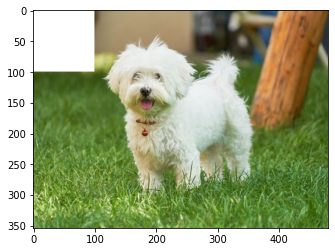

In [ ]:
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

import matplotlib.pyplot as plt
import time

start_time = time.time()
from tqdm import tqdm

#첫번째 방법 - 개별 픽셀에 적용
for i in tqdm(range(0,100)):
  for j in range(0,100):
    image[i,j] = [255,255,255]

print('--- %s seconds ---' % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #컬러로 변경
plt.show()

# 직접 i와 j를 조작해줘야함.

--- 0.0001392364501953125 seconds ---


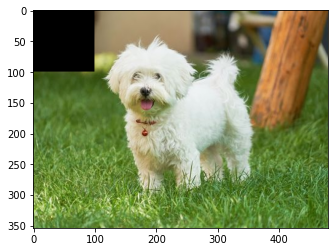

In [ ]:
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

import matplotlib.pyplot as plt
import time

start_time = time.time()
from tqdm import tqdm

# 두번째 방법 - 번위를 지정하고 바꾸는 방법 - 슬라이싱적용

image[0:100 , 0:100] = [0, 0, 0]
print('--- %s seconds ---' %  (time.time()-start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #컬러로 변경
plt.show()

#처리속도가 빠름

## ROI 추출 및 복사
- Region of Interest
- computer vision : 특정 이미지에서 유의미한 feature들을 추출할때 feature가 들어있는 공간을 interest 한 부분이라고 함. ( region of interest)
- 유의미한 부분만 추출한다는 것.

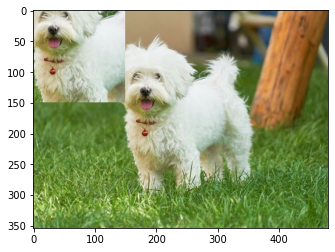

In [ ]:
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

# Numpy Slicing : ROI 처리 가능
roi = image[100:250, 150:300]

# ROI 단위로 이미지 복사하기
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 픽셀별 색상 다루기

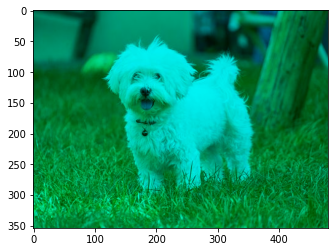

In [ ]:
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

image[:, :, 2] = 0 
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.show()

# 이미지 변형

## 이미지 크기 변경 

- 이미지 크기 조절
cv2.resize(image, dsize, fx,fy, interpolation)
- dsize : Manual Size
- fx : 가로비율
- fy : 세로비율
- interpolation : 보간법

*inter_cubic : 사이즈를 크게 할 때 주로 사용
*inter_area : 사이즈를 작게 할 때 주로 사용
* 보간법 : 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미.

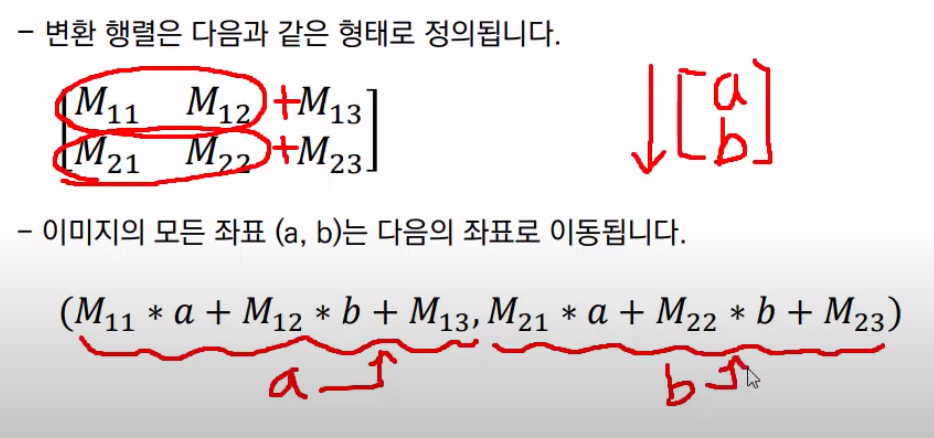

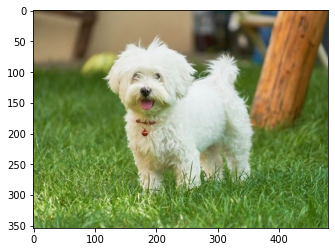

In [ ]:
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.show()

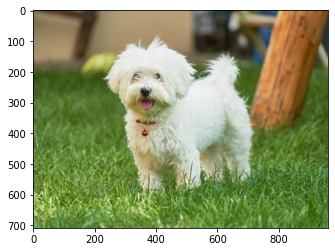

In [ ]:
# 확대 # 척도의 증가
expand = cv2.resize(image, None, fx = 2.0, fy = 2.0, interpolation=cv2.INTER_CUBIC) # 가로 세로 두배
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

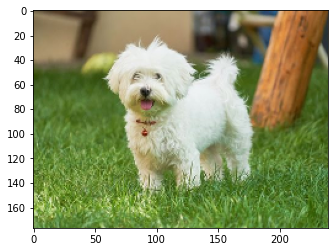

In [ ]:
# 축소 # 척도의 감소
shrink = cv2.resize(image, None, fx = 0.5 , fy = 0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(shrink , cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 위치 변경

cv2.wrapAffine(image,M,dsize)
- M : 변환행렬
- dsize : Manual Size

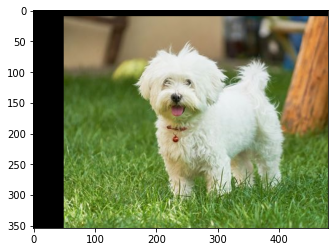

In [ ]:
import cv2 #colab already insstalled
image = cv2.imread('dog.jfif')

import numpy as np
import matplotlib.pyplot as plt
# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = np.float32([[1, 0, 50], [0, 1, 10]]) # 오른쪽에는 50 , 아래로는 10
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 회전

cv2.getRotationMatrix2D(center,angle,scale)
- center : 회전 중심
- angle : 회전 각도
- scale : Scale Factor